In [1]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2024-03-20 10:50:22--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.007s  

2024-03-20 10:50:22 (8.19 MB/s) - ‘titanic.csv’ saved [60302/60302]



1. Взять датасет !wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv  
2. Предсказать значение столбца Выживаемость на основе других признаков;
3. Решить задачу регрессии, используя алгоритм линейной регрессии;
 4. Оценить качество регрессии при помощи метрики MSE.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("titanic.csv")

In [50]:
train, test = train_test_split(data, test_size=0.33)

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
features = ["Sex", "Pclass", "SibSp", "Parch"]
values = pd.get_dummies(train[features])
values_test = pd.get_dummies(test[features])
total = train["Survived"]

In [53]:
values

,Pclass,SibSp,Parch,Sex_female,Sex_male
615,2,1,2,1,0
676,3,0,0,0,1
328,3,1,1,1,0
356,1,0,1,1,0
245,1,2,0,0,1
...,...,...,...,...,...
178,2,0,0,0,1
91,3,0,0,0,1
835,1,1,1,1,0
887,1,0,0,1,0


In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(values, total)

RandomForestClassifier()

In [55]:
predictions = model.predict(values_test)

In [56]:
pd.DataFrame({"PassengerId": test.PassengerId, "Survived":predictions})

,PassengerId,Survived
293,294,1
88,89,1
862,863,1
469,470,1
688,689,0
...,...,...
833,834,0
581,582,1
204,205,0
172,173,1


In [68]:
x = data.iloc[:,:1].values #массив из id
y = data.iloc[:, 1].dropna().values #2 столбец


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
regressor = LinearRegression()

In [72]:
regressor.fit(x_train, y_train)

LinearRegression()

In [73]:
print("Смещение", regressor.intercept_)
print("Наклон", regressor.coef_[0])

Смещение 0.38899235809364185
Наклон -1.2554920703739972e-05


In [74]:
y_predict = regressor.predict(x_test)

In [75]:
pd.DataFrame({"Предсказанное":y_predict, "Фактическое":y_test})

,Предсказанное,Фактическое
0,0.382765,0
1,0.380844,0
2,0.385490,0
3,0.388591,1
4,0.385778,1
...,...,...
174,0.379187,1
175,0.378471,0
176,0.386280,1
177,0.378522,0


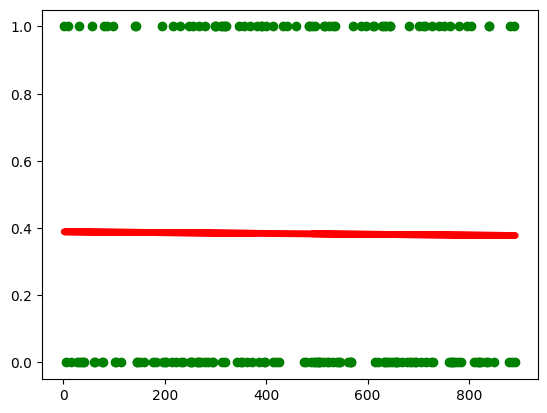

In [76]:
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test, y_predict, color="red", linewidth=5)

Сгенерировать наборы данных (см. картинки ниже): Для каждого набора данных: • Обучить и протестировать KNN • Построить графики точности (train/test) при разных k (1...8) • Построить границы классов

Переписать класс KNN, заменим операции в цикле на векторные вычисления (используйте библиотеку numpy)

In [77]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [78]:
x, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=0)

Text(0.5, 1.0, 'Test')

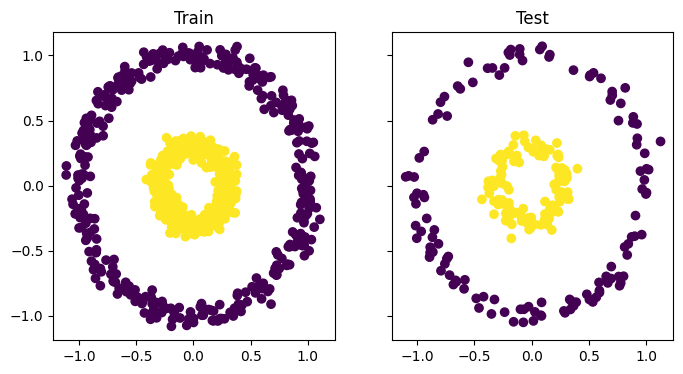

In [82]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
train_ax.scatter(x_train[:,0],x_train[:,1],c=y_train)
train_ax.set_title("Train")
test_ax.scatter(x_test[:,0],x_test[:,1],c=y_test)
test_ax.set_title("Test")

In [83]:
knn = KNeighborsClassifier(n_neighbors=9)
knn_model_1 = knn.fit(x_train, y_train)
knn_model_2 = knn.fit(x_test, y_test)
knn_predict_1 = knn_model_1.predict(x_train)
knn_predict_2 = knn_model_2.predict(x_test)

In [85]:
predict1 = knn_model_1.predict(x_test) #обучаем на противоположном массиве

In [ ]:
print(knn_predict_1)
print(y_train)

In [84]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(y_test, predict1)

1.0

In [87]:
for neighbor in range(1, 9):
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn_model = knn.fit(x_train, y_train)
  knn_prediction = knn_model.predict(x_test)
  accuracy = accuracy_score(y_test, knn_prediction)
  print(f"Accuracy: {accuracy}, neighbor count: {neighbor}")

Accuracy: 1.0, neighbor count: 1
Accuracy: 1.0, neighbor count: 2
Accuracy: 1.0, neighbor count: 3
Accuracy: 1.0, neighbor count: 4
Accuracy: 1.0, neighbor count: 5
Accuracy: 1.0, neighbor count: 6
Accuracy: 1.0, neighbor count: 7
Accuracy: 1.0, neighbor count: 8


In [89]:
from sklearn.datasets import make_moons

In [93]:
x, y = make_moons(n_samples=1000, noise=0.05)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=0)

Text(0.5, 1.0, 'Test')

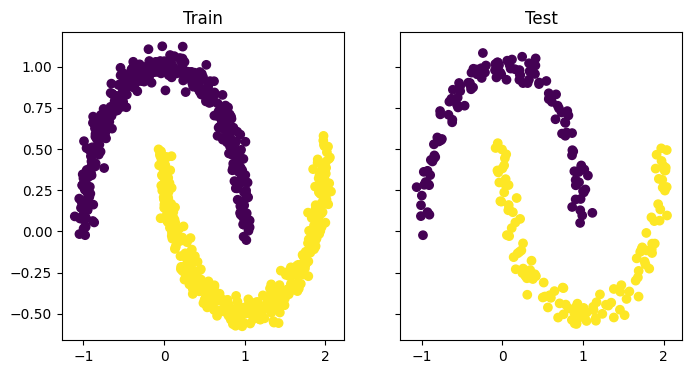

In [94]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8,4))
train_ax.scatter(x_train[:,0],x_train[:,1],c=y_train)
train_ax.set_title("Train")
test_ax.scatter(x_test[:,0],x_test[:,1],c=y_test)
test_ax.set_title("Test")

In [95]:
knn = KNeighborsClassifier(n_neighbors=9)
knn_model_1 = knn.fit(x_train, y_train)
knn_model_2 = knn.fit(x_test, y_test)
knn_predict_1 = knn_model_1.predict(x_train)
knn_predict_2 = knn_model_2.predict(x_test)

In [96]:
predict1 = knn_model_1.predict(x_test)

In [97]:
accuracy_score(y_test, predict1)

1.0

In [98]:
for neighbor in range(1, 9):
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn_model = knn.fit(x_train, y_train)
  knn_prediction = knn_model.predict(x_test)
  accuracy = accuracy_score(y_test, knn_prediction)
  print(f"Accuracy: {accuracy}, neighbor count: {neighbor}")

Accuracy: 1.0, neighbor count: 1
Accuracy: 1.0, neighbor count: 2
Accuracy: 1.0, neighbor count: 3
Accuracy: 1.0, neighbor count: 4
Accuracy: 1.0, neighbor count: 5
Accuracy: 1.0, neighbor count: 6
Accuracy: 1.0, neighbor count: 7
Accuracy: 1.0, neighbor count: 8
